In [1]:
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

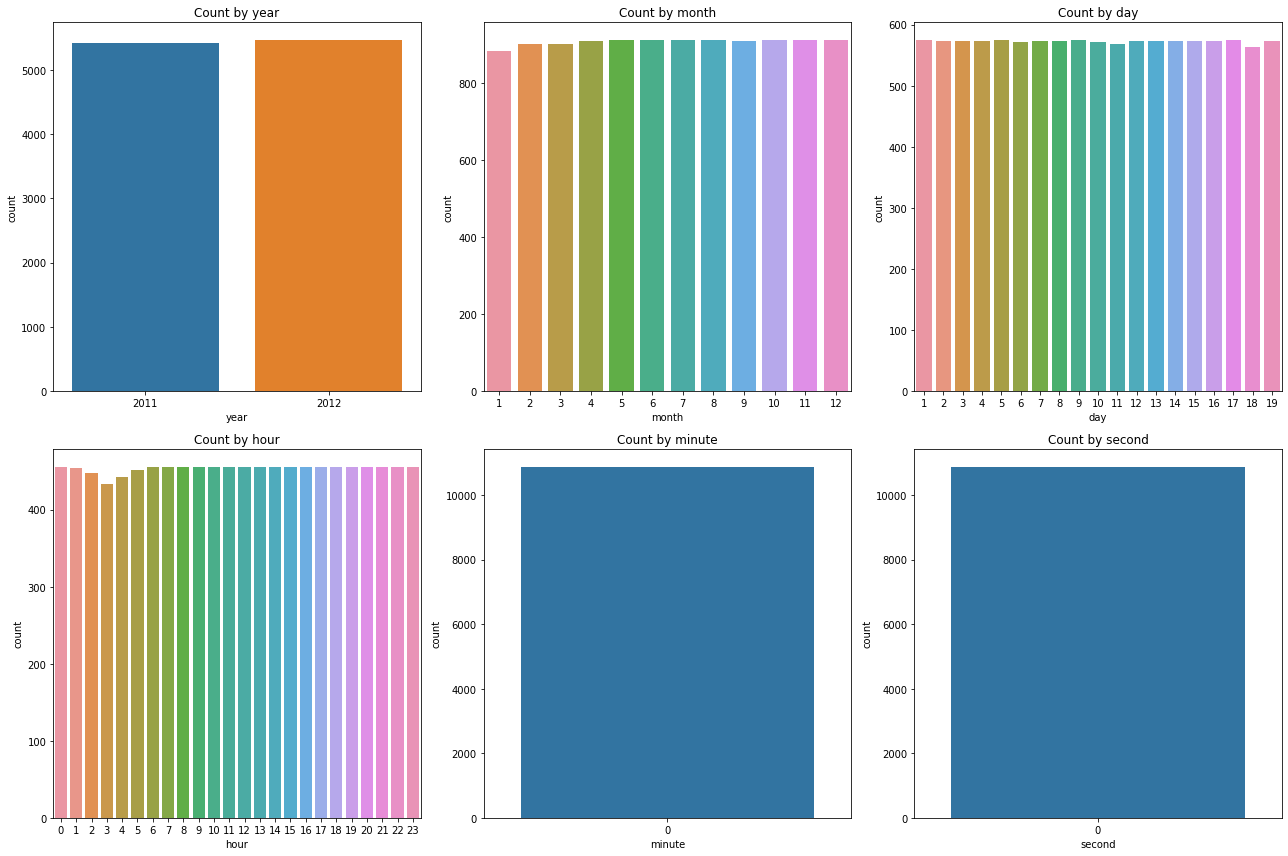

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

time_features = ['year', 'month', 'day', 'hour', 'minute', 'second']

plt.figure(figsize=(18, 12))

for i in range(len(time_features)):
    col = time_features[i]
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=train, x=col)
    plt.title(f'Count by {col}')

plt.tight_layout()
plt.show()


In [4]:
#count 맞추려고 할거니까 count = casual + registered 두개 빼주자

X = train.drop(columns=['datetime', 'count', 'casual', 'registered'])
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


MSE: 19945.37
RMSE: 141.23


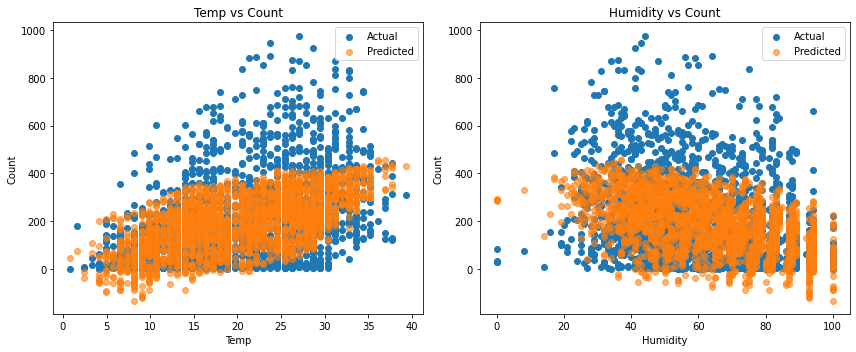

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_test, label='Actual')
plt.scatter(X_test['temp'], y_pred, label='Predicted', alpha=0.6)
plt.xlabel('Temp')
plt.ylabel('Count')
plt.title('Temp vs Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_test, label='Actual')
plt.scatter(X_test['humidity'], y_pred, label='Predicted', alpha=0.6)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity vs Count')
plt.legend()

plt.tight_layout()
plt.show()
